# <h1><center>Reto técnico DS</center></h1> <a class="anchor" id="5"></a>

![](https://media-exp2.licdn.com/dms/image/C4E0BAQFZvOVKaSv-Ng/company-logo_200_200/0/1535043168299?e=2147483647&v=beta&t=QF3T2CIyXiQc3-y44S8dQH1AF51HGhCNW2iLDHtbWHM)

**Instrucciones:**
* El presente reto consta de tres preguntas, de las cuales, tendrás que elegir y resolver
dos de ellas.

* Al recibir el reto, tendrás tres días para resolverlo y entregarlo.

* El entregable constará de los siguiente:
    * Repositorio que contenga todos el material que generaste durante la resolución del reto.
    * Presentación ejecutiva de resultados.

* Cualquier duda o ayuda que requieras (incluso si quieres platicar sobre ideas para resolver el reto), comunícate con José, el Lead de DS, al 5544509009.


# Tabla de Contenido

1. [Experiencia en Proyectos de ML](#1)

    1.1. [Problema de negocio](#1.1)
    
    1.2. [Principales retos](#1.2)
    
    1.3. [El conjunto de datos](#1.3)
   
    1.4. [Metodología utilizada](#1.4)
    
    1.5. [Incorporacion al flujo de la empresa](#1.5)
    
    1.6. [Aprendizaje y resultados obtenidos](#1.6)


2. [Caso de Uso](#2)

    2.1 [Información del sistema y versiones de librerias ](#2.1)
    
    2.2 [Ingesta de Datos](#2.2)
    
    2.3 [Estructura de Datos](#2.3)
    
    2.4 [Ubicación Geográfica de los inmuebles](#2.4)
    
    2.5 [Análisis de datos](#2.5)
    
    2.6 [Análisis Geoestadistico (En desarrollo)](#2.6)
    
    2.7 [Modelo para determinar precio de la vivienda](#2.7)
    
      2.7.1 [Ingenieria de Caracteristicas](#2.7.1)
        
      2.7.2 [Modelo de evaluación](#2.7.2)
      
      2.7.3 [¿Cúales variables impactan en el precio?](#2.7.3)
      
      
3. [Web app](#3)

    3.1 [Más sobre Modelos en producción ](#3.1)
    
    3.2 [ MLFlow y AWS](#3.2)
    
    
4. [Conclusiones](#4)

----

# 1. Experiencia en Proyectos de ML <a class="anchor" id="1"></a>

Resume tu experiencia con algún proyecto de ML del que te sientas orgullos@. Resume el
problema de negocio, los principales retos, el conjunto de datos, la metodología utilizada, la
forma de incorporarlo en los procesos de la empresa, tus aprendizajes y los resultados
obtenidos.

## 1.1 Problema de negocio <a class="anchor" id="1.1"></a>

El más complejo y retador a la fecha ha sido en la empresa donde me encuentro actualmente, donde no existia ningun tipo de modelo ni mucho menos una infraestructura para servir modelos, solo dos personas con sueños y ganas de que esta empresa lograra su objectivo en cuanto a ciencia de datos.

El problema radica en la división de créditos al consumo para México y Chile, donde en resumen, se le otorga un microprestamo al cliente con la finalidad que pudiera construir un historial financiero, usarlo en casos de emergencia, o como tambien crear ese laso con la compañia y lograr el acceso una variedad de productos los cuales se encuentran dentro del ecosistema de la empresa. Para esto, se necesitaba un sistema de evaluación el cual ayudase a identificar casos de riesgo y fraude oportunamente y con esto impactar a OKR principal de la divisón: **Reducir la Morosidad**.

## 1.2 Principales retos <a class="anchor" id="1.2"></a>

Los principales retos era:

1. Crear el nuevo modelo de evaluación.
2. La infraestructura y/o arquitectura que hará posible servir modelos en producción.

## 1.3 El conjunto de datos <a class="anchor" id="1.3"></a>

Los conjuntos de datos era complejo dado que existen 3 productos y la relación entre cada uno de ellos llevaban a indagar en tablas de hasta 400GB de datos no relacionales, esto incluida información del cliente, su interacción fuera y dentro de la plataforma, información crediticia, información relacionada al producto financiero de créditos, y entre otras fuentes de datos tanto externas como internas.

## 1.4 Metodología utilizada <a class="anchor" id="1.4"></a>

Para los modelos de evaluación usamos 2 algoritmos, cada uno en distinta etapa: **Regresión Logistica y XGBoost**. Para no extendernos demasiado, solo hablaré de la **Regresión Logistica**.

#### Regresión logistica:

**¿Porqué este modelo?**

Sencillo, porque este modelo es usado frecuente mente para problemas de clasificación binaria y en caso de ser un conjunto de datos pequeño (Como lo era el producto de creditos), este algoritmo haria un buen trabajo (Evitando usar modelos complejos para evitar sobreajuste/overfitting)

Otro punto importante a considerar desde la perspectiva de MLOps (Operaciones de Aprendizaje automatico, por sus siglas en inglés), la dificultad radica en lanzar a producción un modelo dado que existen una variedad de casos de uso y que estos se puedan ajustar a la arquitectura llevada acabo y los recursos computacionales disponibles. Sin embargo, este algoritmo no necesita recursos extensos, por lo que quiero decir que, puedo entrenarlo desde maquina local sin problema alguno.😄 En caso contrario de que sea una cantidad extensa de datos y necesitemos recurso adicional **(ya sea crecimiento vertical= Aumento de vCPU's, GPU, RAM u horizontal= Paralelismo, clusters, etc)** aqui podemos usar **SAGEMAKER** ya que nos pone a dispocisión un **Notebook Instance** que no es mas que un Jupyter Notebook y podemos calendarizar Training Jobs (Periodos de entrenamientos ligados a una EC2 administrada por Sagemaker), les dejo un ejemplo donde se usan los propios contenedores de Sagemaker ubicados en algun repositorio en ECR y todo lo referente  a i|o (Artifacts) en S3 o porqué no, también existe Databricks de Microsoft. 🤔


![](https://miro.medium.com/max/1400/0*fouh2uP1Yw6lBno3.png)

**Complejidad del modelo**

Otro punto que comentaba era la complejidad, que si vemos el eje Y o linea horizontal que forma la grafica, podemos establecer de izquierda a derecha modelos de regresion hasta redes neuronales. Este tipo de modelos a veces es un poco complicado encontrar el **Bias** adecuado, que quiere decir que es la dificultar de encontrar patrones relevantes de los datos dados (input),que exista algun tipo de aprendizaje o capturar la verdadera relación. 😉

![](https://showmax.engineering/2021/05/machine-learning-part-1/model_complexity-fc47176a.png)

**Regresión Logistica**

$$ ln(\frac{P}{1-P})= b_{0}+b_{1}x_{x} $$

**Función Sigmoide (No-lineal)**

$$ P = \frac {1}{1+e^Y} $$

El calculo de probabilidad nos ayuda a definir un punto de corte dado cierto objetivo de negocio. En este ejemplo gráfico el umbral es de 0.5:

![](https://static.javatpoint.com/tutorial/machine-learning/images/logistic-regression-in-machine-learning.png)


Desde **sklearn** API, este algoritmo se encuentra disponible, para lo cual adjunto su documentación: [skelarn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) Logistic Regression

El algoritmo se adapta a problemas clasificación binaria y multiclase. Y como dato adicional, la **función softmax** es usada para predecir la probabilidad de una variable multiclase😯.

**L2 para la suma de cuadrados sobre los residuales**:

$\sum_{i=1}^n(Y_i-\sum_{j=1}^p x_{ij} \beta_j)^2 + \lambda\sum_{j=1}^p \beta_j^2 $


**L2 para Logit**:

Grande $\lambda$ = Alto Sesgo and baja Varianza.

Pequeño $\lambda$ = Bajo Sesgo and alta Varianza.

$\lambda$ = 1 es un ajuste conservador.

Donde esto solo quiere decir, que optimiza la suma de probabilidaddes porque la regresion logistica usa **Maximum Likelihood**.

**suma de las probabilidades + $\lambda  \times slope^2 $**



## 1.5 Incorporacion al flujo de la empresa <a class="anchor" id="1.5"></a>

Era de gran importancia conocer el flujo de producto, sin embargo, esto fue sencillo una vez que estuviera definido los pasos del proceso, para esto el modelo ya estaba servido en la nube y por lo tanto una función hacia la llamada al modelo la cual contenia una API (API con su respectiva URL) con un método POST el cual su funcionalidad no era mas que ir a buscar los datos del cliente y pasarlos por modelo. Entonces este nos regresaba una calificación y dado el punto de corte que existiera en el momento, iba a ser rechazado o aceptado para avanzar a la siguiente etapa.


## 1.6 Aprendizaje y resultados obtenidos <a class="anchor" id="1.6"></a>

Logramos usar eficientemente los recursos disponibles para mitigar deuda técnica, tener un modelo de evaluación sofisticado y una arquitectura que respalda cada lanzamiento a producción. Esto nos ayudó a fijar puntos de corte para alcanzar ciertos objetivos y tener control sobre este proceso de evaluación puesto que también nos permite actualizarnos a lo que está pasando en el mundo y con esto me refiero al tema de **Data Drift**.

----


# 2. Caso de uso <a class="anchor" id="2"></a>

El archivo reto_precios.csv contiene información sobre precios de departamentos nuevos
dentro de la CDMX, junto con diversas características del inmueble. Para esta pregunta,
requerimos que nos puedas explicar los factores que influyen en el precio por metro cuadrado
de cada vivienda (Hint: Existe información externa que te podría ser útil para resolver esta
pregunta).

El conocimiento empirico nos dice que los factores que inciden en el precio del m2 de las viviendas son:

1. Calidad de los acabados.
2. Bienes muebles disponibles.
3. Análisis de plusvalia.

En el siguiente estudio haremos un estudio para determinar el precio por m2 dado el uso de ciencia del dato.


# 2.1 Información del sistema y versiones de librerias <a class="anchor" id="2.1"></a>

In [8]:
import sys
import platform
import pandas as pd
import numpy as np
import streamlit as st

print("Información de sistema")
print('----------------------------------------------------')
print("""Python version: %s
system: %s
machine: %s
platform: %s
""" % (
sys.version.split('\n'),
platform.system(),
platform.machine(),
platform.platform()
))


print('Librerias - Versiones necesarias para producción')
print('----------------------------------------------------')
config = {'pip':[
    'numpy=={}'.format(np.__version__),
    'pandas=={}'.format(pd.__version__),
    'streamlit=={}'.format(st.__version__)
]
}
print(config)

Información de sistema
----------------------------------------------------
Python version: ['3.7.3 (default, Mar 27 2019, 22:11:17) ', '[GCC 7.3.0]']
system: Linux
machine: x86_64
platform: Linux-5.10.16.3-microsoft-standard-WSL2-x86_64-with-debian-bullseye-sid

Librerias - Versiones necesarias para producción
----------------------------------------------------
{'pip': ['numpy==1.21.5', 'pandas==1.3.5', 'streamlit==1.8.1']}


# 2.2 Ingesta de Datos <a class="anchor" id="2.2"></a>


Usamos el motor de SQLite para hacer consultar directamente desde nuestro dataset y aprovechar al máximo la funcionalidad de SQL.

In [9]:
from ds_config import ddtres_db as ddtres
pd.pandas.set_option('display.max_columns',None)
pd.pandas.set_option('display.max_rows',None)
import matplotlib.pyplot as plt
import seaborn as sb
import datetime 
from datetime import date, timedelta

# Initialize ddtres database

ddtres.connect()

2022-08-04 15:21:41.156 WARNING root: Warning message: Install necessary dependencies - run 'pip install -r requirements.txt' command


Connection Established to ddtres_data


In [11]:
# Subir tabla a ddtres_data db

ddtres.upload_table('reto_precios','real_state_data')

# Instancia del metodo get_query_table

query = ddtres.get_query_table

# Tablas disponibles sobre ddtres_data

ddtres.show_tables()

# Más sobre la clase ddtres_db - Descomentar la siguiente linea de codigo

# ??ddtres 

2022-08-04 15:22:34.795 INFO    root: Table uploaded successfully


Connection Established to ddtres_data
Connection Established to ddtres_data


[('real_state_data',)]

## 2. 3 Estructura de Datos <a class="anchor" id="2.3"></a>

Tipos

In [14]:
dataset = """
SELECT *
FROM real_state_data rs
"""

montly_fee = """ SELECT id,CAST(substr(monthly_fee,1,INSTR(monthly_fee, " ")) AS INTEGER) as monthly_fee_transformed
FROM real_state_data"""

data = pd.merge(query(dataset).drop('index',axis=1), query(montly_fee),how='inner',on='id')
data.info()
division = '-'*55

# Data Structure
print('\nData Records')
print(division)

cat_vars = [var for var in data.columns if data[var].dtype == 'O']
print('Number of categorical variables:', len(cat_vars))

num_vars = [var for var in data.columns if data[var].dtype in ('float64','int64')]
print('Number of numerical variables:', len(num_vars))

##Chec NA values through the variables
var_with_na = [var for var in data.columns if data[var].isnull().sum()>0]
cat_na = [var for var in cat_vars if var in var_with_na]
num_na = [var for var in num_vars if var in var_with_na]

print('Number of categorical variables with NA:', len(cat_na),'----------->', cat_na)
print('Number of numerical variables with NA:', len(num_na),'---------->', num_na)
print(division)
print(f'Shape of matrix format: {data.shape}')
print(division)

Connection Established to ddtres_data
Connection Established to ddtres_data
<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 980
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   main_name                981 non-null    object 
 1   subtitle                 981 non-null    object 
 2   link                     981 non-null    object 
 3   location                 981 non-null    object 
 4   price                    981 non-null    object 
 5   attributes               981 non-null    object 
 6   timestamp                981 non-null    object 
 7   id                       981 non-null    int64  
 8   address                  702 non-null    object 
 9   since                    981 non-null    object 
 10  description              981 non-null    object 
 11  vendor                   981 non-null    object 
 12  lat                      981 non-null    float64
 13  lon 

# 2.4 Ubicación geografica de los inmuebles <a class="anchor" id="2.4"></a>

Donde se encuentran estos hogares.

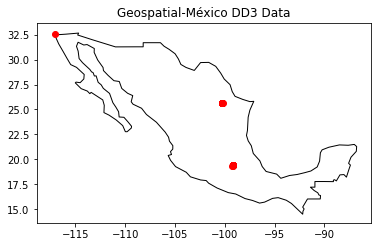

In [38]:
import geopandas

df = data[['lat','lon']]

gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.lon, df.lat))

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))


# Mexico
ax = world[world.name == 'Mexico'].plot(
    color='white', edgecolor='black')

# Plot
gdf.plot(ax=ax, color='red')
ax.set_title('Geospatial-México DD3 Data')
plt.show()

# 2.5 Analisis de Datos <a class="anchor" id="2.5"></a>


Existen algunas observaciones: 

1. Es la presencia de distribución normal sobre el precio por m2.
2. Para los boxplot en relación del precio por m2 y el número de habitaciones, para 1 y 4 habitaciones no existen (en su mayoria) valores atipicos. (Este valor comunmente son calculados con 2+ $\sigma$. Para el máximo número de habitaciones es probable que sea de una casa ya que los departamenos y casas se valuan diferente.

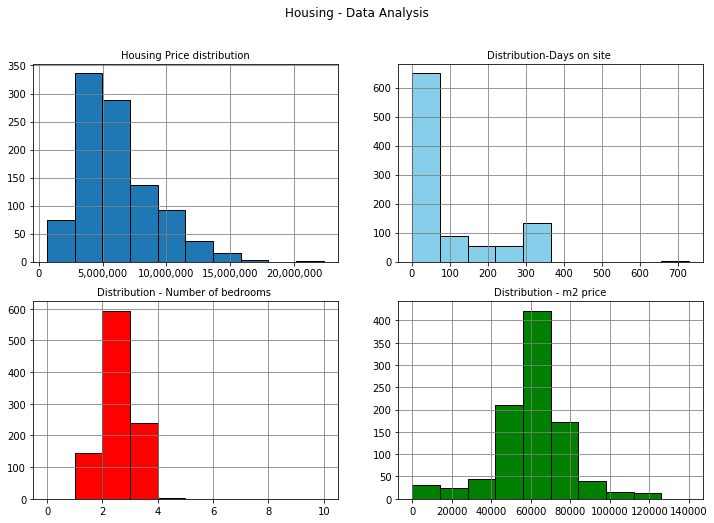

In [70]:
import matplotlib as mpl
from matplotlib.figure import Figure


fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2,2,figsize=(12,8))

fig.suptitle('Housing - Data Analysis')

ax1.hist(data['price_mod'],ec="black")
ax1.grid(color='grey')
ax1.set_facecolor("white")
ax1.set_title('Housing Price distribution',fontsize=10)
ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax1.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0000f}'))

ax2.hist(data['days_on_site'],color = "skyblue", ec="black")
ax2.grid(color='grey')
ax2.set_facecolor("white")
ax2.set_title('Distribution-Days on site ',fontsize=10)
ax2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

ax3.hist(data['num_bedrooms'],color = "red", ec="black",bins=10,range= [0,10])
ax3.grid(color='grey')
ax3.set_facecolor("white")
ax3.set_title('Distribution - Number of bedrooms ',fontsize=10)
ax3.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

ax4.hist(data['price_square_meter'],color = "green", ec="black",bins=10,range= [0,140000],cumulative=False)
ax4.grid(color='grey')
ax4.set_facecolor("white")
ax4.set_title('Distribution - m2 price',fontsize=10)
ax4.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))


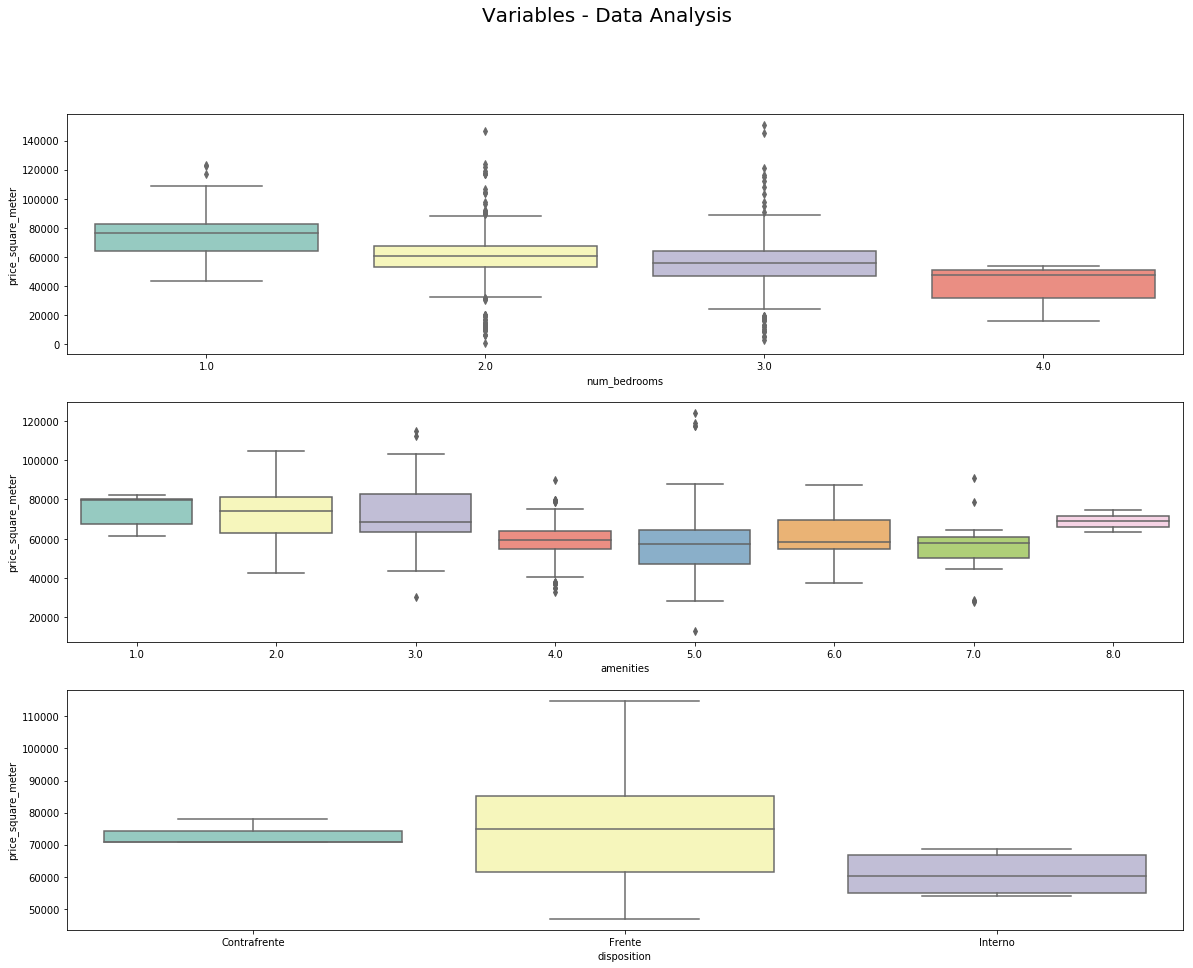

In [46]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(20,15))

fig.suptitle('Variables - Data Analysis',fontsize=20)

sb.boxplot(x="num_bedrooms", y="price_square_meter",
                data=data, palette="Set3", ax=ax1)

sb.boxplot(x="amenities", y="price_square_meter",
                 data=data, palette="Set3",ax=ax2)

sb.boxplot(x="disposition", y="price_square_meter",
                 data=data, palette="Set3",ax=ax3)

# 2.6 Análisis Geoestadistico <a class="anchor" id="2.6"></a>

Conexión a la API de INEGI para indagar en la información del DENUE y MarcoGeoestadistico.

In [12]:
# from INEGIpy import Indicadores, DENUE, MarcoGeoestadistico

# # Se requiere un token proporcionado por el INEGI
# token = [token necesario]
# indicador = Indicadores(token) 

# geo = indicador.catalogo_indicadores('BISE',
#                                  indicador = None)

# indicador.obtener_df('6207048603',inicio= '2000',clave_area = '09')

# 2.7 Modelo para determinar precio de la vivienda  <a class="anchor" id="2.7"></a>

En esta sección haremos una recalibración, en el supuesto de que nuestra variable de respuesta ya fue previamente entrenada (precio) y haremos un reentrenamiento para encontrar las variables que explican el precio por m2. Para esto, usaremos un modelo **XGBoost Regresivo**.

## 2.7.1 Ingenieria de Caracteristicas <a class="anchor" id="2.7.1"></a>

In [157]:
# Convertir variables a categorias
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

df_set = data[['days_on_site','amenities','age_in_years','bathrooms',
           'cellars','num_floors','monthly_fee_transformed','apartments_per_floor',
           'parking_lots','floor_situated','num_bedrooms','m2','final_price','lat','lon']]

# cat_columns = df_set[['disposition','orientation']].columns

# cat_var={col: data[col].nunique() for col in cat_columns}
# cat_var
  
# # Entendimiento de etiquetas
# label_encoder = preprocessing.LabelEncoder()
  
# # Encode Labels

# for e in cat_columns:
#     df_set[e]= label_encoder.fit_transform(df_set[e])
  

# Metodo en caso de tener problemas con valores nulos en variables númericas (Multivariate Imputation by Chained Equation)
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer

# def imputation(df: str, var: list) -> pd.DataFrame:
#     """
#     handle missing values and replace values from original dataset
#     df: pd.DataFrame()
#     var: list of columns
    
#     return: pd.Dataframe
#     """
#     imp = IterativeImputer(max_iter=10, random_state=0)
#     imp.fit(df[var])
#     dataset = pd.DataFrame(imp.transform(df[var]),columns= df[var].columns)
    
#     if not len(dataset.columns)>0:
#         raise AssertionError('Error-There is not transformed columns')
        
#     for cols in dataset.columns:
#         df[cols] = dataset[cols]
        
#     return df

## 2.7.2 Modelo de evaluación <a class="anchor" id="2.7.2"></a>

Para visualizar el problema, crearemos los siguientes arboles con XGBoost, el cual nos ayudará a predecir el valor de la viviendo dado las variables anteriormente estudiadas y transformadas. Donde de manera práctica asignamos valores iterativos manualmente en **hiperparametros** para obtener una mejor respues sobre la métrica de **Root Mean Squared Error**.

In [158]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, roc_auc_score,make_scorer,roc_curve,auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
import xgboost

x = df_set.drop('final_price',axis=1)
y = df_set['final_price']

x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=0,test_size=.30)


trees = xgboost.XGBRegressor(missing=1,
                                seed=42,
                               gamma=0.25,
                               learning_rate=0.1,
                               max_depth=4,
                               reg_lambda=10,
                               scale_pos_weight=3,
                                subsample=0.9,
                                colsample_bytree=0.5,
                                random_state=42,
                                n_estimators=10
                               )

trees.fit(x_train,y_train,verbose=True,early_stopping_rounds=50,eval_set=[(x_test,y_test)])

[0]	validation_0-rmse:6127976.50000
[1]	validation_0-rmse:5609781.50000
[2]	validation_0-rmse:5116678.50000
[3]	validation_0-rmse:4700041.50000
[4]	validation_0-rmse:4327313.50000
[5]	validation_0-rmse:4016464.00000
[6]	validation_0-rmse:3739658.25000
[7]	validation_0-rmse:3459484.50000
[8]	validation_0-rmse:3238384.00000
[9]	validation_0-rmse:3009963.00000


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, enable_categorical=False,
             gamma=0.25, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=1,
             monotone_constraints='()', n_estimators=10, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=10, scale_pos_weight=3, seed=42,
             subsample=0.9, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [159]:
# Guardar modelo
import pickle

with open('modelo', 'wb') as file:
     pickle.dump(trees, file)
        
#Nos aseguramos que el modelo se encuentre en nuestro directorio de trabajo usando nuestro shell bash dentro de jupyter
#Al modelo le asignamos el nombre de:modelo
print('Working directory-files:')
!ls | grep modelo

Working directory-files:
modelo


# 2.7.3 ¿Cúales variables impactan en el precio? <a class="anchor" id="2.7.3"></a>

Como lo comentamos anteriormente, empiricamente el precio del m2 de las viviendas son determinados por los siguientes puntos:

1. Calidad de los acabados.
2. Bienes muebles disponibles dentro de la vivienda.
3. Análisis de plusvalia. (Donde está ubicada, puntos importante de la ciudad, etc)

Sin embargo, dado el tiempo disponible de desarrollo me hubiese encantado indagar más en un análisis GeoEspacial algo que buscaba realizar la con **API de INEGI y Kepler** el cual se quedó en desarrollo en el punto 2.6. Dado esto, realizamos un modelo el cual nos ayudara a determinar el precio del inmueble y posteriormente a obtener el precio por m2, para encontrar que variables impactan a nivel de modelos.

En resumen, las variables las 7 variables mas importantes son:

1. Número de estacionamientos.
2. m2.
3. Amenidades.
4. Ubicación (Lat y Lon)
5. Baños.
6. Número de habitaciones.

In [ ]:
# Predicción

y_pred = trees.predict(x)
new_df = pd.DataFrame()
new_df['price_prediction'],new_df['final_price'] = y_pred, df_set['final_price']
new_df['m2'],new_df['price_square_meter'] = df_set['m2'],data['price_square_meter']
new_df['m2_price_prediction'] = new_df['price_prediction']/new_df['m2']

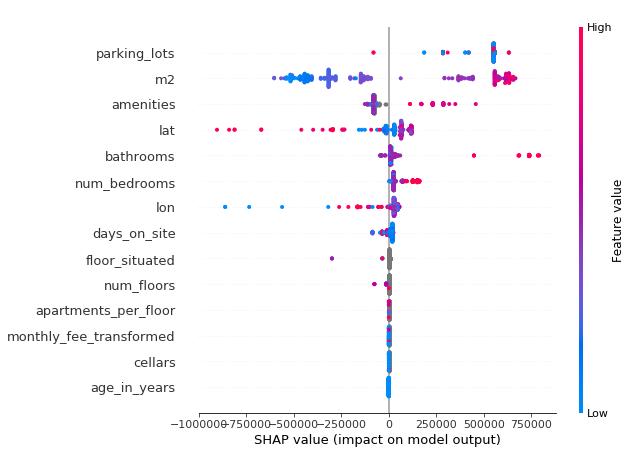

In [161]:
# Shap values son basados en la teoria de juegos.
# Variables ordenadas en importancia marginal

import shap 

explainer = shap.TreeExplainer(trees)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test,show=False)

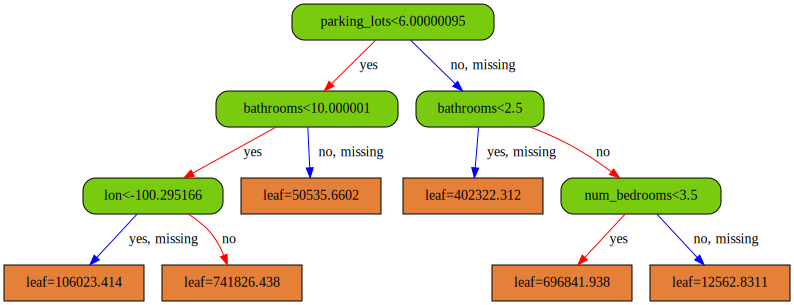

In [162]:
dtree=xgboost.to_graphviz(trees,num_trees=1,size="100,60",
                   condition_node_params=node_params,
                   leaf_node_params=leaf_params,)

dtree

In [163]:
# Importancia relativa

bst = trees.get_booster()
for importance_type in ('weight','gain','cover','total_gain','total_cover'):
    print('%s: '%importance_type, bst.get_score(importance_type=importance_type))
node_params={
    'shape': 'box',
    'style': 'filled,rounded',
    'fillcolor': '#78cbe'    
}

leaf_params={
    'shape': 'box',
    'style': 'filled',
    'fillcolor': '#e48038'    
}

weight:  {'days_on_site': 5.0, 'amenities': 4.0, 'bathrooms': 10.0, 'num_floors': 1.0, 'parking_lots': 3.0, 'floor_situated': 1.0, 'num_bedrooms': 7.0, 'm2': 11.0, 'lat': 13.0, 'lon': 10.0}
gain:  {'days_on_site': 7887932358656.0, 'amenities': 34035376062464.0, 'bathrooms': 180475331084288.0, 'num_floors': 578344189952.0, 'parking_lots': 603172322148352.0, 'floor_situated': 4558034042880.0, 'num_bedrooms': 73737114222592.0, 'm2': 355853475512320.0, 'lat': 13214726225920.0, 'lon': 10021660262400.0}
cover:  {'days_on_site': 116.80000305175781, 'amenities': 392.5, 'bathrooms': 410.0, 'num_floors': 46.0, 'parking_lots': 621.0, 'floor_situated': 80.0, 'num_bedrooms': 261.8571472167969, 'm2': 389.9090881347656, 'lat': 231.76922607421875, 'lon': 145.3000030517578}
total_gain:  {'days_on_site': 39439661268992.0, 'amenities': 136141504249856.0, 'bathrooms': 1804753310842880.0, 'num_floors': 578344189952.0, 'parking_lots': 1809516966445056.0, 'floor_situated': 4558034042880.0, 'num_bedrooms': 51

# 3 Web app <a class="anchor" id="3"></a>

Esta no es la mejor manera de hacerlo para hacer un deployment a escala pero hagamos un ejemplo de algun front-end con Streamlit (Que corre en React) que es simple. ¿Porqué digo que no es lo optimo? Porque la empresa ya cuentan con un front-end y usando algun framework en especial, por lo tanto, la mejor manera es crear un **endpoint** desde Sagamaker o algun otro microframework back-end y API REST como **Flask** o **Django**.

In [ ]:
txt=""" 
1.- Para correr la app necesitaras usar algun distro de Linux 
se recomienda la versión descrita en la primera seccion del notebook

2.- Si instalaste correctamente las dependencias, omite este paso.
!pip install streamlit <-- (esta sintaxis puede cambiar al usar Propmt o Powershell)

3.- Es necesario usar la misma version de libreria, favor de ir a la sección de "Información del sistema y 
versiones de librerias".

4.- Corres la app con el siguiente comando ---> streamlit run ml-app.py (debe ser forzosamente extension .py y 
se encuentra dentro de la misma ruta (path)
"""

#!streamlit run ml-app.py

## 3.1 Más sobre Modelos en producción <a class="anchor" id="3.1"></a>

Es importante comentar que llegar a este punto ya es hablar de MLOps y todo lo que implica sacar un modelo a producción, sin embargo, es importante aclarar el labor de cada una de las personas que intervienen en el proceso de los modelos:

1. **Data Scientis**: (Explorar datos y crear modelos)
2. **Data Engineer**: (Disponibilizar la data e infraestructura de la misma)
3. **Machine Learning Engineer:** Toma lo que hace el Data Scientist para llevar a sistemas de producción a escala, que es algo que ya estamos haciendo en este momento)
4. **Devops:** Intervienen en la conexión del Modelo y la aplicacion del usuario final (En pocas palabras esta al pendiente que el modelo no afecte a la aplicacion y le preocupa la escalabilidad, estabilidad y la respuesta de esa interacción.
5. **IT:** Administracion de recursos, permisos, seguridad.


**Y este punto nos lleva a conocer un poco más sobre el laborar del Machine Learning Engineer** 


## ¿Cómo creamos estos sistema a escala?

Bueno, es importante aclarar el porqué es necesario. Las ventajas de contar con una infraestructura adecuada nos permite:

1. Ser escalables.
2. Administración efectiva de modelos y software.
3. Desarrollo colaborativo.
4. Optimización de desempeño.
5. Conseguir reproducibilidad.


Esto es una tarea compleja, ya que hay entender que en el ciclo de vida de los modelos donde se define la contrucción, entrenamiento, lanzamiento y servida del modelo. Para esto uso una herramiento open-source que ayuda a administrar todo este pipeline donde tambien se incluye administración de experimentos y repositorio central de modelos (A veces necesitamos usar mas de 1 modelo en producción o hacer pruebas A/B). 

Vamos a hablar de las diferentes formas de poner un modelo en producción y obtener los resultados.


# 3.2  MLFlow y AWS <a class="anchor" id="3.3"></a>

Cabe destacar que para hacer uso efeciente de AWS necesitamos recursos disponibles (Alguna cuenta de laboratorio) que lo hace un poco complejo replicar todo un flujo de trabajo eficiente.

Mlflow es una plataforma de fuente abierta para el ciclo de vida de proyectos de ML, con estos 4 componentes, los equipos de datos son mas eficientes y mas organizados a la hora de generar un modelo desde su contruccion hasta su alojamiento en la nube.

![](https://lh4.googleusercontent.com/rwaMzrCLImiQtWVp0g5lcKS_Q82xaizNjHq2B3B0Cj93UL1kMREDOMsVJ-9yExH498z_elQPmiE43yILSxpl-HMmuvbTgacDMUmw4kIsOvowJKqCXHlEQSqEDeGWZsAMM78CJTv4)


**Sin más que agregar, es importante destacar que MLflow nos permite hostear modelos de 2 maneras :**

1. Desde el repositorio de modelos de Mlflow como un REST Endoint para hacer pruebas locales.
2. En la nube. (Aqui uso la infraestructura de Amazon y servicios de ML para llevar acabo esta labor😉)

Estas herramientas en conjunto son un potenciador para los equipos de ciencia de datos e ingenieros de aprendizaje automatico.

Aca les comparto un ejemplo de como trabaja con AWS Sagemaker.

**(Aqui lo importante es que al subir el modelo al model registry este crea un endpoint en Sagemaker, despues se crea una API Gateway y esta se manda a llamar desde una funcion Lambda en AWS y asi, se inscrusta desde un front-end ya listo  para personalizar la URL al gusto)** 😳

![](https://miro.medium.com/max/1400/1*Cis5j5PyHYjFMgwbS1cxDQ.png)

Y al igual que AWS Sagemaker tiene contenedores propios, Mlflow cuenta con los suyos para hacer esto posible. Sin embargo, el trabajo importante es adaptar el **images** a tus necesidades, en un momento pondré ejemplos de proyectos que anteriormente he atendido.


## mlflow.sagemaker

El modulo mlflow.sagemaker provee una API para lanzar modelos desde Mlflow en Sagemaker (Esto es conveniente cuando estas entrenando localmente y no es necesario el componente de entrenamiento de sagemaker.

- Sigamos el quickstart donde se habla un poco de la instalacion y acceso a la Mlflow UI.
- Tener un modelo listo en el registry de mlflow. (Puede contener sus métricas, artifacs, requirements y configuraciones)
- Antes de que tengamos el modelo es importante modificar la siguiente funcion de python [mlflow.pyfunc](https://www.mlflow.org/docs/latest/_modules/mlflow/pyfunc.html) que está ligada al contenedor que existirá en ECR, sin embargo, esto es uno de los pasos mas complejos ya que debemos adaptar el caso de uso.
- Puedes intentar entrar a la UI con el comando mlflow ui desde linux.

Aqui viene lo interesante con respecto a sagemaker, es necesario correr algunas lineas de comando para obtener lo siguiente (Voy a ilustrar algunos ejemplos desde mi cuenta personal).

- Lanzamos el contenedor a ECR (Elastic Container registry) de AWS con el siguiente comando: mlflow sagemaker build-and-push-container y con esto ya habriamos de haber creado el images en el repo de **mlflow-pyfunc** 


- Nos cercioramos que todo está enorme con el siguiente comando: aws ecr describe-images --repository-name mlflow-pyfunct --region-name **$REGION**


- Corremos el comando mlflow sagemaker run-local -m **$MODEL_PATH** -p **LOCAL_PORT** (Tome en cuenta que estas son variables de entorno de una sesiona actual y las cuales ya no existiran luego de inicies otro shell) y esto nos servirá para hacer pruebas locales


- Y por último, si todo sale bien, tendremos un endpoint en nuestro apartado de **inference** en sagemaker. 


- Y adicionalmente podrás hacer configuraciones a tu endpoint como por ejemplo, puedes hacer un **ProductionVariant** que es util para pruebas A/B o multimodelos en un solo endpoint, tambien otro ejemplo y va por el lado de ahorro de recursos es un endpoint serverless o usar el tradicional provisionado. Ojo que es importante observar en que tipo de instancia está colgado el endpoint por tema de costos (Por esto, no hice pruebas desde mis cuentas🙃).

![](endpoint.png)

Como te has dado cuenta, todo lo hicimos desde local y aprovechamos el feature de inference de sagemaker para hacer mas escalable los procesos de deployment y hosting.

## AWS Sagemaker 

Llegamos a la parte más compleja que es aprovechar al 100% los recursos de sagemaker que demandan tiempo invertido en **orquestar** ciertos pipelines y tener disponibilidad de recursos financieros.

Cabe destacar que existen 9 componentes de Sagemaker:

- **Studio:** Dentro del estudio tenemos acceso a Notebooks, Feature store, Data wrangle, etc. Siempre con una instancia escendida para cada servicio lo cual es costoso.
- **Ground Truth:** Servicio para etiquetar data.
- **Notebook:** Igual que un jupyter notebook pero desde una instancia.
- **Processing:** Los processing jobs son aquellas transformaciones de datos constantes y necesitan correrse cada cierto tiempo. (Feature engineering, validacion y evaluacion)
- **Training:** Capacidad de entrenar modelos desde contenedores de Amazon, y al igual que mlflow, necesitan ser configurados o simplemente puedes usar el contenedor que ya te ofrece amazon (Para este caso de uso en particular en este ejercicio iba a ser necesario hacer cambios en el images al incrustar este script y sin embargo, tambien es posible crear tu propio contenedor, ademas este componente es util cuando tus recurso de computacion local no es necesario para llevar acabo el proceso de entrenamiento.
- **Inference:** Aqui encontraremos todos los modelos entrenados **Model Registry** al igual que Mlflow y los endpoint vinculados a los modelos, además de hacer inferencia en Real-time o en forma Batch.
- **Edge Manager:** Incrustar modelos en dispositivos.
- **Augmented AI:** Ver de diferentes enfoques los datos, por ejemplo, una imagen puede tomar diferentes formas si esta es rotada a 90º, 60º, etc. Debemos preparar los algoritmos cuando se presenten estos tipos de casos.
- **AWS Marketplace:** Te permite comprar o vender algoritmos.

Como te daras cuenta, usamos solo algunos de los servicios de manera que cumpliera con el caso de uso actual, lo cual nos permite ser innovadores y a su vez ahorrar en costos de recursos de computacion. Es importante aclarar que estas herramientas son utiles porque cumplen con una funcion importante y es el ciclo de entrega de modelos bajo un enfoque Devops, llamado de otra manera, **MLOps**. Resumiremos esto en una ilustración.

![](https://anotherreeshu.files.wordpress.com/2021/03/mlops-cycle-v2-1.png)

Todo este proceso de **Diseño (Requerimiento de datos, ingenieria, herramientas), Desarrollo (Modelos,evaluación y validación) y Operaciones (Monitoreo, CI/CD/CT)** se cumple en sagemaker y el reto es orquestar todo este proceso hasta hacer una entrega eficiente de modelos que es como se describe bajo alguna arquitectura de MLOps que opera entre la intersección de la ciencia de datos y la ingenieria.

Y como último punto, al ser tan extenso este pipeline; comunmente nos enfrentamos con problemas de Deuda Técnica.🧐 


## Conclusiones <a class="anchor" id="4"></a>

Como podran observar a lo largo del proyecto pudimoss describir sintetizadamente mi experiencia en proyectos de ML, a su vez, indagamos todos los pasos de ciclo de vida del aprendizaje automatico:

1. Ingesta de datos.
2. Extracción.
3. Análisis. (y todos los pasos involucrados)
4. Evaluación.
5. Lanzamiento a producción.

Lo cual me parece satisfactorio para este caso en particular dado lo que habia comentado anteriormente, me hubiera gustado tener más tiempo de dedicación al proyecto ya que fue de mi interés en recabar información GeoEstadistica, al igual que tener más acceso información interna para determinar mejor un resultado de factores con importancia relativa/marginal.

# ¡Gracias! 

----


### [ Volver al inicio](#5)